In [ ]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 

# Example path (adjust based on your structure)
path = 'advertising.csv'
 

dataset = pd.read_csv(path)
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# # Encode categorical 'State' column (index 3)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X_encoded = ct.fit_transform(X)
 
# # Convert to numpy array and inspect
# X = np.array(X_encoded)
# print('\nAfter OneHotEncoding, feature shape:', X.shape)
# print('\nFirst 5 rows after encoding:')
# print(X[:5])

Dataset shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Feature preview (first 5 rows):
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


In [4]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 160
Test samples: 40
Intercept: 4.773205203269825
Number of coefficients: 3


In [5]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual sales': y_test,
    'Predicted sales': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual sales,Predicted sales
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 4.52
R^2 Score: 0.8645


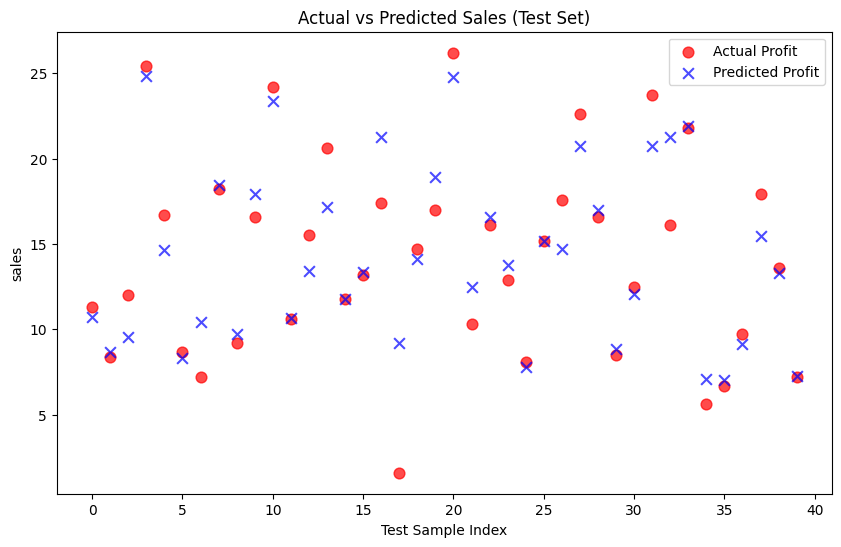

In [ ]:
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('sales')
plt.legend()
plt.show()